In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("placement.csv")

In [23]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [19]:
df = df.iloc[:,1:]

In [20]:
df.shape

(100, 3)

In [21]:
# Steps 

# 0. Preprocess + EDA + Feature Selection 
# 1. Extract input and output cols 
# 2. Scale the values 
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model


In [22]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


# EDA

In [25]:
import matplotlib.pyplot as plt

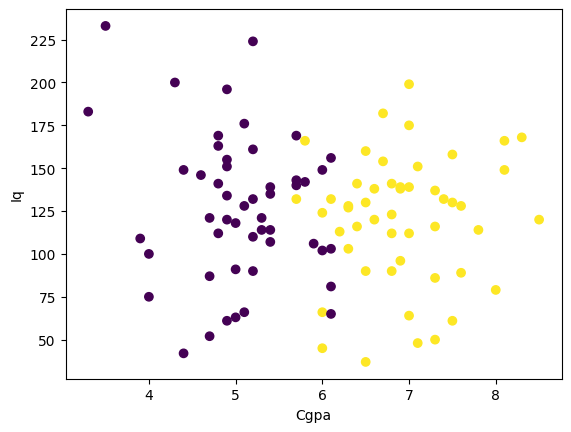

In [27]:
plt.scatter(df['cgpa'],df['iq'], c=df['placement'])
plt.xlabel("Cgpa")
plt.ylabel("Iq")
plt.show()

# Feature Selection

# Extract input variables 


In [32]:
X = df.iloc[:,0:2] # sare rows and 2 column
y = df.iloc[:,-1] # sare rows and last wala column 

In [33]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [34]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

# Train Test split

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3) # test size 0.3 means 30 persent will go in test and 70 in train

In [41]:
X_train

,cgpa,iq
50,3.5,233.0
77,7.3,50.0
26,7.0,199.0
12,5.4,139.0
83,7.5,130.0
...,...,...
10,6.0,45.0
61,7.3,137.0
16,5.2,224.0
37,8.1,149.0


In [42]:
X_test

,cgpa,iq
31,3.9,109.0
58,8.0,79.0
34,4.8,163.0
19,5.2,132.0
64,7.0,64.0
84,5.7,169.0
18,4.0,100.0
65,8.1,166.0
4,5.8,142.0
79,6.5,90.0


In [47]:
y_train

50    0
77    1
26    1
12    0
83    1
     ..
10    1
61    1
16    0
37    1
66    1
Name: placement, Length: 70, dtype: int64

In [48]:
y_test

31    0
58    1
34    0
19    0
64    1
84    0
18    0
65    1
4     0
79    1
75    0
41    0
95    0
71    1
13    1
85    1
72    1
53    1
1     0
44    1
60    1
62    0
2     0
70    1
52    1
98    1
68    0
92    0
32    1
43    1
Name: placement, dtype: int64

# Scaling

In [50]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()

In [56]:
X_train = scaler.fit_transform(X_train) # will return a transformed version of X_train

In [57]:
X_train

array([[-2.22041561,  2.65566224],
       [ 1.20352962, -1.73615719],
       [ 0.93321815,  1.83969579],
       [-0.50844299,  0.39975499],
       [ 1.38373726,  0.18376387],
       [ 2.28477548, -0.05622626],
       [-0.77875446, -1.35217298],
       [-0.77875446,  0.13576585],
       [-0.9589621 , -0.05622626],
       [-1.13916975, -0.03222725],
       [-1.04906592, -0.24821837],
       [ 0.03217994, -1.35217298],
       [ 1.47384108,  0.13576585],
       [-0.86885828, -1.42417002],
       [ 0.57280287, -0.05622626],
       [-0.23813153,  0.42375401],
       [-2.40062325,  1.45571158],
       [-0.9589621 ,  0.7837392 ],
       [-0.9589621 ,  0.68774315],
       [-0.86885828, -0.75219764],
       [-1.40948121, -1.92814929],
       [ 0.03217994,  0.63974512],
       [-0.50844299,  0.30375894],
       [-0.50844299, -0.36821343],
       [-1.13916975, -0.8481937 ],
       [ 1.20352962, -0.87219271],
       [-1.13916975, -1.68815916],
       [ 0.93321815, -0.24821837],
       [-0.23813153,

In [58]:
X_test = scaler.transform(X_test)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [59]:
X_test

array([[  3.9, 109. ],
       [  8. ,  79. ],
       [  4.8, 163. ],
       [  5.2, 132. ],
       [  7. ,  64. ],
       [  5.7, 169. ],
       [  4. , 100. ],
       [  8.1, 166. ],
       [  5.8, 142. ],
       [  6.5,  90. ],
       [  4.8, 169. ],
       [  5.4, 114. ],
       [  4.3, 200. ],
       [  6.1, 132. ],
       [  6.4, 116. ],
       [  5.8, 166. ],
       [  7.3, 116. ],
       [  8.3, 168. ],
       [  5.9, 106. ],
       [  7.5,  61. ],
       [  6.9, 139. ],
       [  6. , 102. ],
       [  5.3, 121. ],
       [  6.3, 127. ],
       [  7. , 175. ],
       [  6.3, 103. ],
       [  4. ,  75. ],
       [  5.2, 110. ],
       [  7. , 139. ],
       [  6.8, 141. ]])

# Train the model

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
clf = LogisticRegression()

In [64]:
# Model Training
clf.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


# Evaluate the model performance

In [75]:
y_pred = clf.predict(X_test)

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
accuracy_score(y_test,y_pred)

0.7

In [78]:
# How to plot decision boundary process 

In [85]:
import pickle # everythings os an object aur piuckle kya karta hai isko file main upload kar dega 

In [86]:
pickle.dump(clf,open('model.pkl','wb'))